<a href="https://colab.research.google.com/github/SeanPatrickHurley/MLE_S25/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN For training Cifar-10

First, we import our CNN libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

Next, we import the data and preprocess it

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [4]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 118ms/step - accuracy: 0.2882 - loss: 1.9113 - val_accuracy: 0.4747 - val_loss: 1.4570
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 113ms/step - accuracy: 0.5081 - loss: 1.3687 - val_accuracy: 0.5502 - val_loss: 1.2633
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 112ms/step - accuracy: 0.5677 - loss: 1.2093 - val_accuracy: 0.5915 - val_loss: 1.1625
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 112ms/step - accuracy: 0.5993 - loss: 1.1251 - val_accuracy: 0.6206 - val_loss: 1.0914
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 113ms/step - accuracy: 0.6364 - loss: 1.0308 - val_accuracy: 0.6330 - val_loss: 1.0500
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 111ms/step - accuracy: 0.6598 - loss: 0.9749 - val_accuracy: 0.6289 - val_loss: 1.0417
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 147s 118ms/step - accuracy: 0.6736 - loss: 0.9305 - val_accuracy: 0.6687 - val_loss: 0.9675
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 112ms/step - accuracy: 0.6873 - loss

Now, since we have run our model, we will not plot the accuracies over time, both training and validation

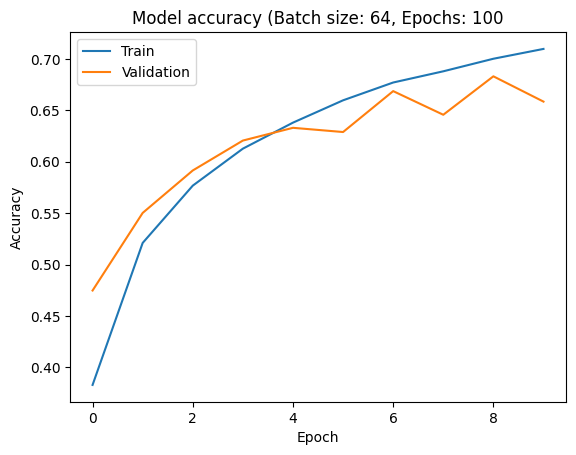

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(f"Model accuracy (Batch size: {64}, Epochs: {100}")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

While *marginally*, the optimized ANN model in hw4 gave a higher training accuracy of ~80% vs ~70% here, this was only after an extreme amount of fine tuning, and with a much lower training accuracy, implying a high level of overfitting.

Instead, our CNN, with only 10 epochs instead of 100, achieves a training and validation accuracy of ~70% and ~65% respectively (rough numbers given for validation accuracy since it is oscilating here).

This is a much better accuracy, with very little signs of overfitting from a first glance (since the training and validation accuracies match closely).

# Now, we will use SVM on the Wisconsin Breast Cancer Training Set

First, we load and process the data

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np

data = load_breast_cancer()

print(data['data'].shape)  # Feature data
print(data['target'].shape)  # Target values
print(data.target_names)

(569, 30)
(569,)
['malignant' 'benign']


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

feature_names = data.feature_names
selected_features = ['worst compactness', 'worst concavity', 'worst area']
selected_indices = [np.where(feature_names == feature)[0][0] for feature in selected_features]
X = data.data[:, selected_indices]
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) #70-30 split with training and test data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now, we make our model

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
linear_accuracy = accuracy_score(y_test, y_pred_linear)
print(f'Linear Kernel SVM Accuracy: {linear_accuracy:.8f}')

Linear Kernel SVM Accuracy: 0.93567251


In [4]:
svm_rbf = SVC(kernel='rbf', C=2)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
rbf_accuracy = accuracy_score(y_test, y_pred_rbf)
print(f'RBF Kernel SVM Accuracy (C=2): {rbf_accuracy:.8f}')

RBF Kernel SVM Accuracy (C=2): 0.93567251


Both of these kernels with hyperparameters as given give the exact same level of accuracy, which implies the radial basis function's induced nonlinearity did not contribute to a change of accuracy. Essentially, the change in boundary did not affect the classification of any points. This may be helpful if orders of magnitude more points are tested, but does not help with the current amount of observations.

To test this theory, we will first plot the accuracy of the rbf with respect to different values of C


In [13]:
C_values = [0.002, 0.005, 0.02, 0.05, 0.2, 0.5, 2, 5, 20, 50, 200, 500, 2000, 5000]
accuracies = []

for C in C_values:
    svm_rbf = SVC(kernel='rbf', C=C)
    svm_rbf.fit(X_train, y_train)
    y_pred_rbf = svm_rbf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_rbf))

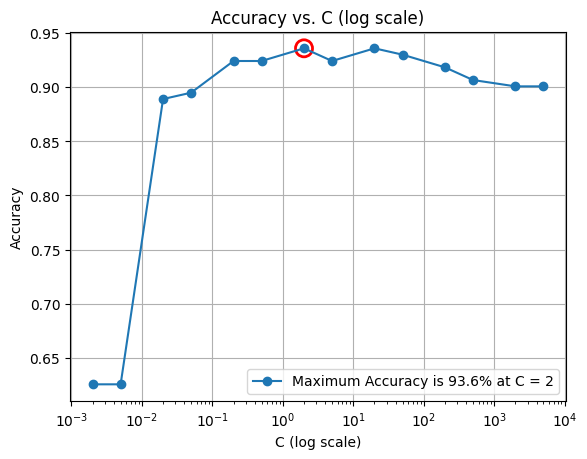

In [30]:
import matplotlib.pyplot as plt

plt.plot(C_values, accuracies, marker='o')

plt.scatter(C_values[np.argmax(accuracies)], max(accuracies), s=150, facecolors='none', edgecolors='red', linewidth=2)

plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C (log scale)')
plt.legend([f'Maximum Accuracy is {100*max(accuracies):.1f}% at C = {C_values[np.argmax(accuracies)]}'])
plt.grid(True)

So, as we can see from the above graph, the value of C=2 is optimal, with significant drop offs when C is decreased, and mild drop of when C is increased. So, the given value in the problem statement was already optimized.

Now, we will try to visualize the difference in the kernels visually, using all three features in a 3D plot

In [8]:
from mpl_toolkits.mplot3d import Axes3D

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
z_min, z_max = X_train[:, 2].min() - 1, X_train[:, 2].max() + 1

xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100),
                         np.linspace(z_min, z_max, 100))

grid = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]

# Predict decision boundary regions
Z_linear = svm_linear.predict(grid).reshape(xx.shape)
Z_rbf = svm_rbf.predict(grid).reshape(xx.shape)

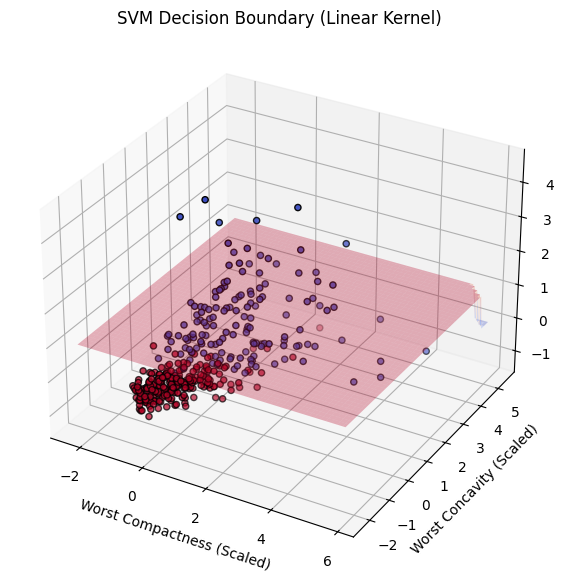

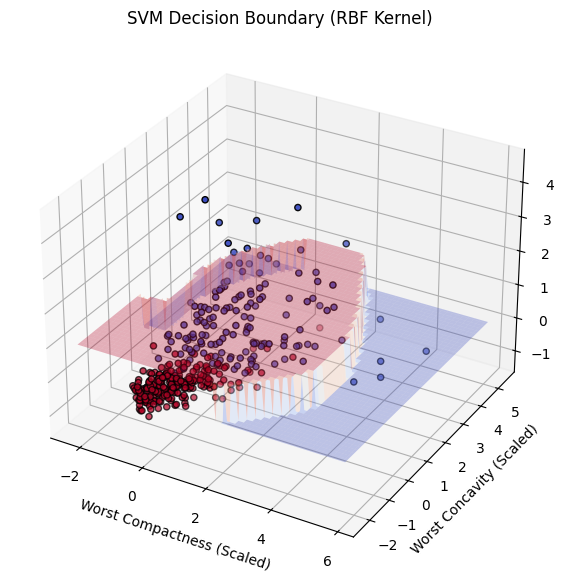

In [9]:
# 3D Plot Function
def plot_svm_decision_boundary_3D(model, Z, title):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter the original training data
    ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

    # Plot decision boundary using plot_surface (for 3D data)
    # Note: This requires reshaping xx, yy, and Z to 2D arrays
    ax.plot_surface(xx[:, :, 0], yy[:, :, 0], Z[:, :, 0], alpha=0.3, cmap=plt.cm.coolwarm)

    # Labels and title
    ax.set_xlabel('Worst Compactness (Scaled)')
    ax.set_ylabel('Worst Concavity (Scaled)')
    ax.set_zlabel('Worst Area (Scaled)')
    ax.set_title(title)

    plt.show()

# Plot both models
plot_svm_decision_boundary_3D(svm_linear, Z_linear, "SVM Decision Boundary (Linear Kernel)")
plot_svm_decision_boundary_3D(svm_rbf, Z_rbf, "SVM Decision Boundary (RBF Kernel)")

However, it is difficult to visualize how these planes split the 3D space, and which points are on which size. To solve this, we will choose the features with highest variance, and compare how rbf and linear kernal split the two

In [33]:
#First, we will find the variances of the three given features, and choose the ones with the higher variance to perform SVM on

#To do this, we need to calculate with respect to the variables before they are transformed.

data = load_breast_cancer()
feature_names = data.feature_names
selected_features = ['worst compactness', 'worst concavity', 'worst area']
selected_indices = [np.where(feature_names == feature)[0][0] for feature in selected_features]
X = data.data[:, selected_indices]
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

variances = np.var(X_train, axis=0)
for i, feature in enumerate(selected_features):
    print(f'{feature}: Variance = {variances[i]:.10f}')

# Find feature with lowest variance
lowest_variance_feature_index = np.argmin(variances)
lowest_variance_feature = selected_features[lowest_variance_feature_index]
print(f'\nFeature with lowest variance: {lowest_variance_feature}')

worst compactness: Variance = 0.0270597884
worst concavity: Variance = 0.0490104788
worst area: Variance = 318898.5961953612

Feature with lowest variance: worst compactness


So, we will choose worst area and worst concavity for our features to train the SVM models on, and compare the kernels

In [35]:
X_reduced = np.delete(X, lowest_variance_feature_index, axis=1)  # Drop from original data

# Now split and scale the reduced data
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_reduced = scaler.fit_transform(X_train_reduced)
X_test_reduced = scaler.transform(X_test_reduced)

In [45]:
x_min_r, x_max_r = X_train_reduced[:, 0].min() - 1, X_train_reduced[:, 0].max() + 1
y_min_r, y_max_r = X_train_reduced[:, 1].min() - 1, X_train_reduced[:, 1].max() + 1

xx_r, yy_r = np.meshgrid(np.linspace(x_min_r, x_max_r, 1000),
                         np.linspace(y_min_r, y_max_r, 1000))

grid_r = np.c_[xx_r.ravel(), yy_r.ravel()]

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_reduced, y_train)  # Fit with reduced data

svm_rbf = SVC(kernel='rbf', C=2)  # Or your optimal C value
svm_rbf.fit(X_train_reduced, y_train)  # Fit with reduced data

# Predict decision boundary regions
Z_linear = svm_linear.predict(grid_r).reshape(xx_r.shape)
Z_rbf = svm_rbf.predict(grid_r).reshape(xx_r.shape)

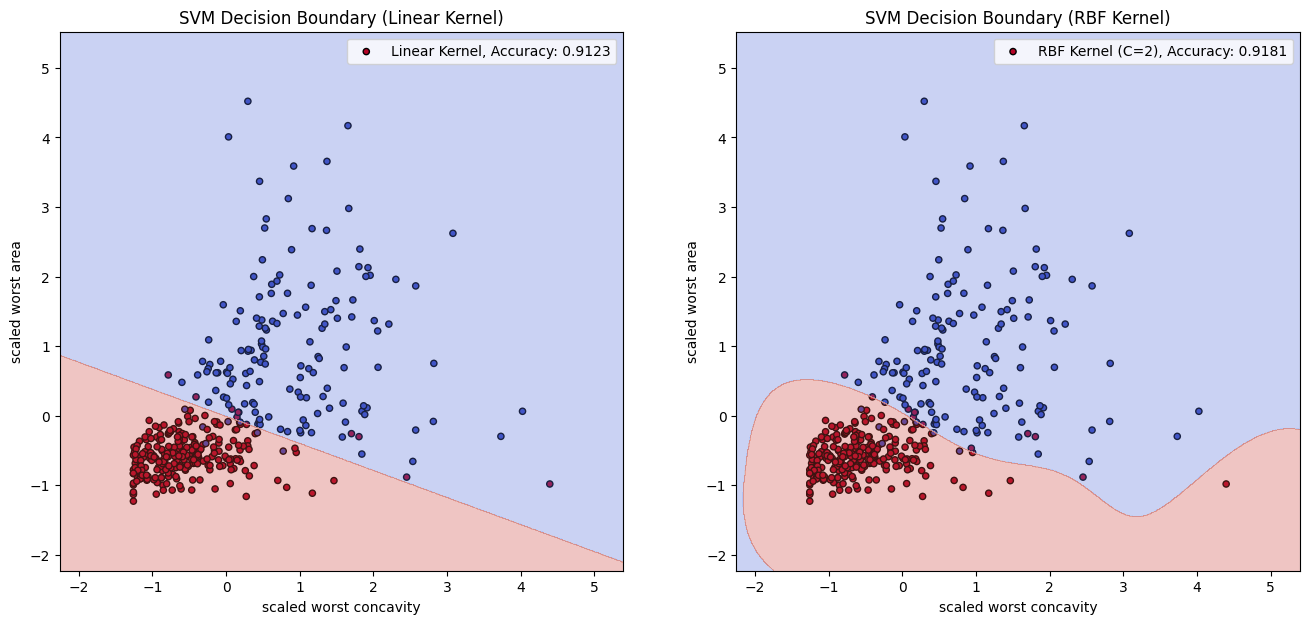

In [46]:
def plot_svm_decision_boundary_2D(X, y, Z_linear, Z_rbf, title, feature_names):
    """Plots the decision boundary of SVM models (linear and RBF) side-by-side in 2D."""

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))  # 1 row, 2 columns for side-by-side plots

    # Scatter plot of the training data (shared for both plots)
    for ax in (ax1, ax2):
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cmS.coolwarm, s=20, edgecolors='k')

    # Contour plot for Linear Kernel
    ax1.contourf(xx_r, yy_r, Z_linear, alpha=0.3, cmap=plt.cm.coolwarm)
    ax1.set_xlabel(f'scaled {feature_names[0]}')
    ax1.set_ylabel(f'scaled {feature_names[1]}')
    ax1.set_title(f'{title} (Linear Kernel)')

    # Contour plot for RBF Kernel
    ax2.contourf(xx_r, yy_r, Z_rbf, alpha=0.3, cmap=plt.cm.coolwarm)
    ax2.set_xlabel(f'scaled {feature_names[0]}')
    ax2.set_ylabel(f'scaled {feature_names[1]}')
    ax2.set_title(f'{title} (RBF Kernel)')

    svm_linear = SVC(kernel='linear')
    svm_linear.fit(X_train_reduced, y_train)
    y_pred_linear = svm_linear.predict(X_test_reduced)
    linear_accuracy = accuracy_score(y_test, y_pred_linear)

    svm_rbf = SVC(kernel='rbf', C=2)
    svm_rbf.fit(X_train_reduced, y_train)
    y_pred_rbf = svm_rbf.predict(X_test_reduced)
    rbf_accuracy = accuracy_score(y_test, y_pred_rbf)

    ax1.legend([f'Linear Kernel, Accuracy: {linear_accuracy:.4f}'])  # Legend for Linear Kernel subplot
    ax2.legend([f'RBF Kernel (C=2), Accuracy: {rbf_accuracy:.4f}'])   # Legend for RBF Kernel subplot

    plt.show()


# ... (Previous code to train SVM models and calculate Z_linear, Z_rbf) ...


# Get feature names for the reduced dataset
reduced_feature_names = [name for i, name in enumerate(selected_features)
                        if i != lowest_variance_feature_index]

# Plot both models side-by-side using the reduced data
plot_svm_decision_boundary_2D(X_train_reduced, y_train, Z_linear, Z_rbf,
                              "SVM Decision Boundary", reduced_feature_names)

Finally, we can properly visualize our initial hypothesis. A change from the linear kernel to a radial basis function kernel does not significantly change the accuracy of our model. So, we can be confident in our previous models that say we have the exact same accuracy between the 2 kernels for all 3 given features. Now, we will reprint this accuracies.

In [48]:
data = load_breast_cancer()

feature_names = data.feature_names
selected_features = ['worst compactness', 'worst concavity', 'worst area']
selected_indices = [np.where(feature_names == feature)[0][0] for feature in selected_features]
X = data.data[:, selected_indices]
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) #70-30 split with training and test data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
linear_accuracy = accuracy_score(y_test, y_pred_linear)
print(f'Linear Kernel SVM Accuracy: {100*linear_accuracy:.2f}%')

svm_rbf = SVC(kernel='rbf', C=2)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
rbf_accuracy = accuracy_score(y_test, y_pred_rbf)
print(f'RBF Kernel SVM Accuracy (C=2): {100*rbf_accuracy:.2f}%')


Linear Kernel SVM Accuracy: 93.57%
RBF Kernel SVM Accuracy (C=2): 93.57%
